In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [32]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [33]:
print(len(os.listdir('./tmp/PetImages/Cat/')))
print(len(os.listdir('./tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [34]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'

# Define root directory
root_dir = './tmp/cats-v-dogs'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

try:
    #YOUR CODE GOES HERE
    os.mkdir('./tmp/cats-v-dogs')
    os.mkdir('./tmp/cats-v-dogs/training')
    os.mkdir('./tmp/cats-v-dogs/testing')
    os.mkdir("./tmp/cats-v-dogs/training/cats/")
    os.mkdir("./tmp/cats-v-dogs/testing/cats/")
    os.mkdir("./tmp/cats-v-dogs/training/dogs/")
    os.mkdir("./tmp/cats-v-dogs/testing/dogs/")

except OSError:
    pass

In [37]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    fileslist = []
    #creating list of files
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if (os.path.getsize(file) > 0):
            fileslist.append(filename)
        else:
            print(file +  " is zero length, so ignoring.")
    
    training_length = int(SPLIT_SIZE*len(fileslist))
    testing_length = int(len(fileslist) - training_length)
    sample = random.sample(fileslist,len(fileslist))
    training_list = sample[0:training_length]
    testing_list = sample[-testing_length:]
    
    for filename in training_list:
        curr_file = SOURCE + filename
        dest = TRAINING + filename
        copyfile(curr_file,dest)
    
    for filename in testing_list:
        curr_file = SOURCE + filename
        dest = TESTING + filename
        copyfile(curr_file,dest)
        
        
    
        
        
    
    
# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "./tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "./tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "./tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "./tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "./tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "./tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

./tmp/PetImages/Cat/666.jpg is zero length, so ignoring.
./tmp/PetImages/Dog/11702.jpg is zero length, so ignoring.


In [39]:
print(len(os.listdir('./tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('./tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('./tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('./tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [42]:
TRAINING_DIR = "./tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale =1.0/255. )
train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                    batch_size =128,
                                                    class_mode = 'binary',
                                                    target_size = (150,150)
)

VALIDATION_DIR = "./tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255. )
validation_generator = validation_datagen.flow_from_directory(directory = VALIDATION_DIR,
                                                              batch_size = 128,
                                                              class_mode= 'binary',
                                                              target_size = (150,150)
)



# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [45]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16 , (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32 , (3,3), activation = 'relu',),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 , (3,3), activation = 'relu',),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/15
 84/176 [=============>................] - ETA: 56s - loss: 0.7507 - accuracy: 0.5592

C:\Users\GILAD\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


176/176 [==============================] - 116s 657ms/step - loss: 0.6794 - accuracy: 0.6113 - val_loss: 0.5772 - val_accuracy: 0.6860
Epoch 2/15
176/176 [==============================] - 114s 644ms/step - loss: 0.5485 - accuracy: 0.7193 - val_loss: 0.5151 - val_accuracy: 0.7476
Epoch 3/15
176/176 [==============================] - 106s 603ms/step - loss: 0.4982 - accuracy: 0.7600 - val_loss: 0.4729 - val_accuracy: 0.7712
Epoch 4/15
176/176 [==============================] - 107s 605ms/step - loss: 0.4539 - accuracy: 0.7845 - val_loss: 0.4538 - val_accuracy: 0.7796
Epoch 5/15
176/176 [==============================] - 106s 600ms/step - loss: 0.4089 - accuracy: 0.8097 - val_loss: 0.4900 - val_accuracy: 0.7700
Epoch 6/15
176/176 [==============================] - 105s 596ms/step - loss: 0.3682 - accuracy: 0.8337 - val_loss: 0.4859 - val_accuracy: 0.7816
Epoch 7/15
176/176 [==============================] - 108s 611ms/step - loss: 0.3271 - accuracy: 0.8568 - val_loss: 0.4073 - val_accura

To pass this assignment, your model should achieve a training accuracy of at least 95% and a validation accuracy of at least 80%

Text(0.5, 1.0, 'Training and validation loss')

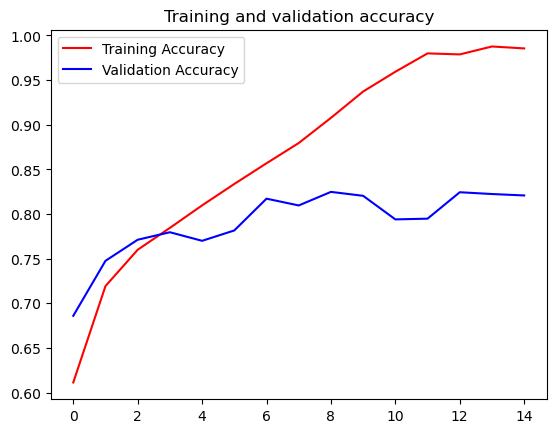

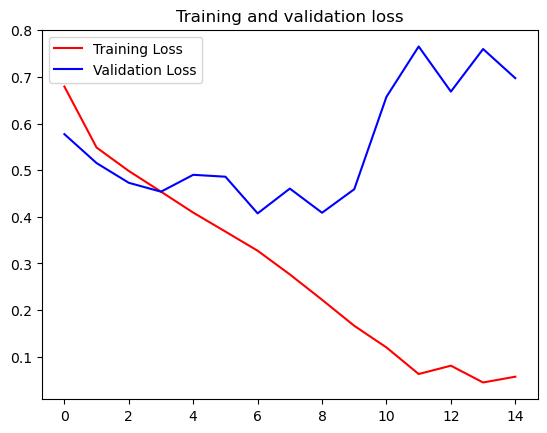

In [60]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend()

plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [59]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

ModuleNotFoundError: No module named 'google.colab'